Diabetic macular edema (DME) is a common disease of diabetic retinopathy (DR). Due to the infection of DME disease, many patients’ vision is lost. To cure DME eye disease, early detection and treatment are very important and vital steps. 

The main goal of this project is develop an Artificial Intelligence solution that can help to classify OCT. To achieve our goal, Deep-Learning (DL) model will be used to predict the risk of patients with diabetes developing diabetic retinopathy. The outcomes would improve patient access to treatment and ease pressures on time and resources in ophthalmology clinics.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import sys
import cv2
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import shutil
from tensorflow.keras import optimizers

In [2]:
labels = ['DME','NORMAL']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1]   
                #cropped_image = img_arr[20:1900, 340:2210]
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr,class_num])
                
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
train =get_data('Input/Train')
test =get_data('Input/Test')

'NoneType' object is not subscriptable


<ipython-input-2-e1896034057b>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


In [4]:
train.shape

(2450, 2)

In [5]:
test.shape

(1050, 2)

In [6]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_val.append(feature)
    y_val.append(label)

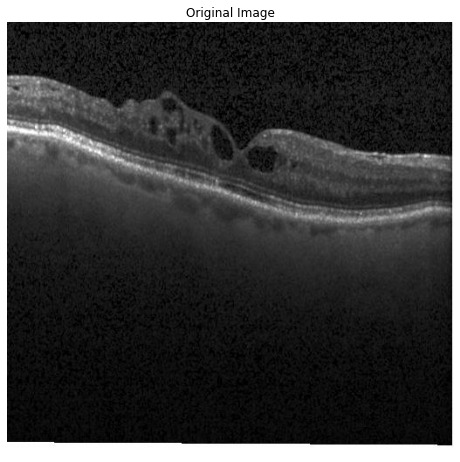

In [7]:
img = cv2.imread('DME-30521-1.jpeg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(img,cmap="gray")
plt.axis('off')
plt.title("Original Image")
plt.show()

In [8]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [9]:

x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

Will build Convolutional Neural Networks (CNN) models with different Convolutional layes then select the best.

In [10]:
#1 Convolutional layes

cnn1 = tf.keras.models.Sequential()

es = EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1)

cnn1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[224, 224, 3]))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2,padding='same' ,strides=2))

cnn1.add(tf.keras.layers.Flatten())
cnn1.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

LEARNING_RATE = 1e-4
optimizer = optimizers.Adam(lr=LEARNING_RATE)

cnn1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


es = EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1)
history1=cnn1.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[es])


/anaconda/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
77/77 [==============================] - 22s 279ms/step - loss: 0.9901 - accuracy: 0.6114 - val_loss: 0.6644 - val_accuracy: 0.5876
Epoch 2/20
77/77 [==============================] - 21s 275ms/step - loss: 0.4191 - accuracy: 0.8159 - val_loss: 0.6669 - val_accuracy: 0.6400
Epoch 3/20
77/77 [==============================] - 21s 277ms/step - loss: 0.1945 - accuracy: 0.9396 - val_loss: 0.6899 - val_accuracy: 0.6733
Epoch 4/20
77/77 [==============================] - 21s 279ms/step - loss: 0.0680 - accuracy: 0.9873 - val_loss: 0.7003 - val_accuracy: 0.6962
Epoch 00004: early stopping


In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, cnn1.predict_classes(x_val))

/anaconda/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.6961904761904761

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = cnn1.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['DME (Class 0)','Normal (Class 1)']))


                  precision    recall  f1-score   support

   DME (Class 0)       0.70      0.69      0.69       525
Normal (Class 1)       0.69      0.70      0.70       525

        accuracy                           0.70      1050
       macro avg       0.70      0.70      0.70      1050
    weighted avg       0.70      0.70      0.70      1050



In [30]:
#The best model is cnn5
cnn1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 394272)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                25233472  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 25,234,433
Trainable params: 25,234,433
Non-trainable params: 0
_________________________________________________________________


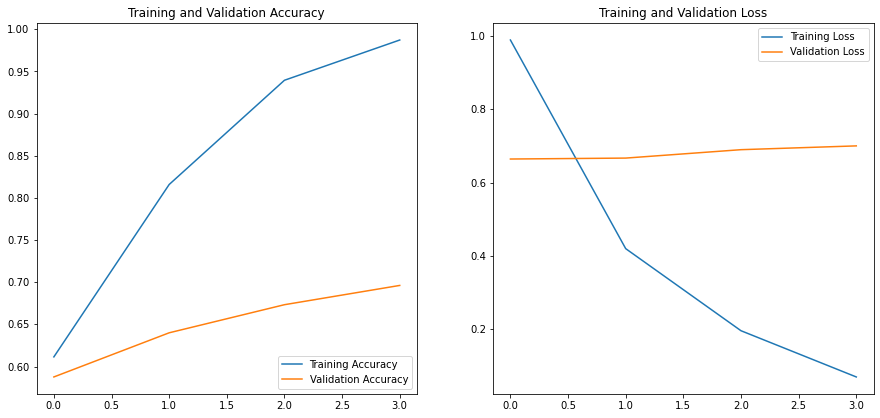

In [34]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(4)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
#2 Convolutional layes

cnn2 = tf.keras.models.Sequential()
es = EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1)
cnn2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[224, 224, 3]))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2,padding='same' ,strides=2))
cnn2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2,padding='same', strides=2))
cnn2.add(tf.keras.layers.Flatten())
cnn2.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

LEARNING_RATE = 1e-4
optimizer = optimizers.Adam(lr=LEARNING_RATE)

cnn2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1)
history2=cnn2.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[es])



/anaconda/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
77/77 [==============================] - 32s 409ms/step - loss: 0.8422 - accuracy: 0.5571 - val_loss: 0.6855 - val_accuracy: 0.5229
Epoch 2/20
77/77 [==============================] - 31s 403ms/step - loss: 0.6460 - accuracy: 0.6482 - val_loss: 0.6841 - val_accuracy: 0.5505
Epoch 3/20
77/77 [==============================] - 31s 403ms/step - loss: 0.5873 - accuracy: 0.7310 - val_loss: 0.6994 - val_accuracy: 0.6114
Epoch 4/20
77/77 [==============================] - 31s 403ms/step - loss: 0.4879 - accuracy: 0.7841 - val_loss: 0.7005 - val_accuracy: 0.6457
Epoch 5/20
77/77 [==============================] - 31s 404ms/step - loss: 0.3199 - accuracy: 0.8727 - val_loss: 0.6719 - val_accuracy: 0.7000
Epoch 6/20
77/77 [==============================] - 31s 404ms/step - loss: 0.2304 - accuracy: 0.9131 - val_loss: 0.6873 - val_accuracy: 0.7048
Epoch 7/20
77/77 [==============================] - 31s 405ms/step - loss: 0.1387 - accuracy: 0.9514 - val_loss: 0.7733 - val_accuracy: 0.7333

In [14]:
accuracy_score(y_val, cnn2.predict_classes(x_val))

0.7028571428571428

In [15]:
predictions = cnn2.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['DME (Class 0)','Normal (Class 1)']))


                  precision    recall  f1-score   support

   DME (Class 0)       0.80      0.54      0.64       525
Normal (Class 1)       0.65      0.87      0.74       525

        accuracy                           0.70      1050
       macro avg       0.73      0.70      0.69      1050
    weighted avg       0.73      0.70      0.69      1050



In [29]:
#The best model is cnn5
cnn2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 96800)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                6195264   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

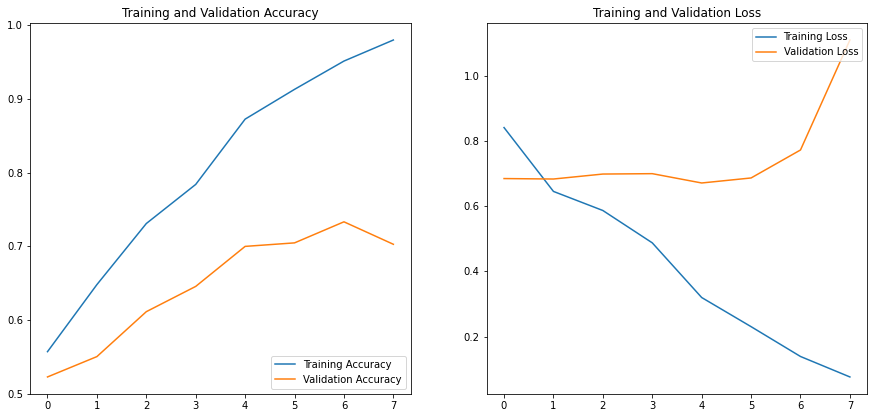

In [33]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(8)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
#3 Convolutional layes

cnn3 = tf.keras.models.Sequential()
es = EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1)
cnn3.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[224, 224, 3]))
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=2,padding='same' ,strides=2))
cnn3.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=2,padding='same', strides=2))
cnn3.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=2,padding='same', strides=2))
cnn3.add(tf.keras.layers.Flatten())
cnn3.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

LEARNING_RATE = 1e-4
optimizer = optimizers.Adam(lr=LEARNING_RATE)

cnn3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


es = EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1)
history3=cnn3.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[es])

Epoch 1/20
77/77 [==============================] - 34s 438ms/step - loss: 0.6412 - accuracy: 0.6290 - val_loss: 0.6590 - val_accuracy: 0.6010
Epoch 2/20
77/77 [==============================] - 33s 430ms/step - loss: 0.5046 - accuracy: 0.7629 - val_loss: 0.6265 - val_accuracy: 0.6714
Epoch 3/20
77/77 [==============================] - 33s 431ms/step - loss: 0.3432 - accuracy: 0.8510 - val_loss: 0.5679 - val_accuracy: 0.7505
Epoch 4/20
77/77 [==============================] - 33s 431ms/step - loss: 0.2269 - accuracy: 0.9110 - val_loss: 0.5669 - val_accuracy: 0.7686
Epoch 5/20
77/77 [==============================] - 33s 431ms/step - loss: 0.1543 - accuracy: 0.9437 - val_loss: 0.5680 - val_accuracy: 0.7762
Epoch 6/20
77/77 [==============================] - 33s 430ms/step - loss: 0.0925 - accuracy: 0.9710 - val_loss: 0.7062 - val_accuracy: 0.7933
Epoch 7/20
77/77 [==============================] - 33s 431ms/step - loss: 0.0577 - accuracy: 0.9841 - val_loss: 0.9131 - val_accuracy: 0.7657

In [17]:
accuracy_score(y_val, cnn3.predict_classes(x_val))

0.7657142857142857

In [18]:
predictions = cnn3.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['DME (Class 0)','Normal (Class 1)']))

                  precision    recall  f1-score   support

   DME (Class 0)       0.82      0.68      0.74       525
Normal (Class 1)       0.73      0.85      0.78       525

        accuracy                           0.77      1050
       macro avg       0.77      0.77      0.76      1050
    weighted avg       0.77      0.77      0.76      1050



In [28]:
#The best model is cnn5
cnn3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 53, 53, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 23328)            

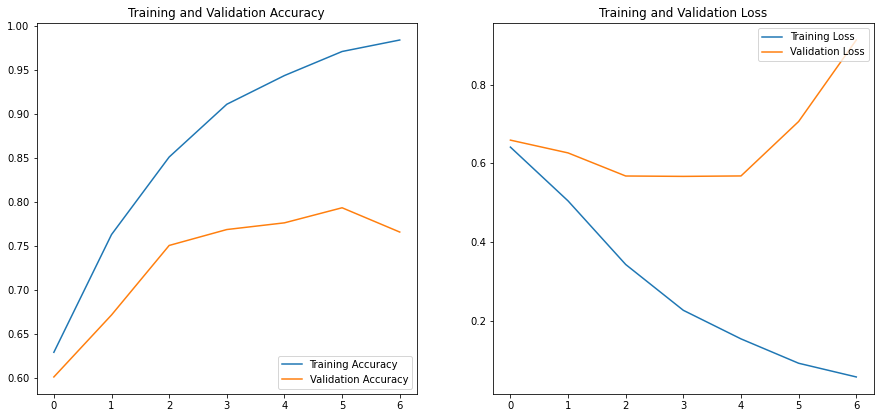

In [32]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs_range = range(7)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
#4 Convolutional layes

cnn4 = tf.keras.models.Sequential()
es = EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1)
cnn4.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[224, 224, 3]))
cnn4.add(tf.keras.layers.MaxPool2D(pool_size=2,padding='same' ,strides=2))
cnn4.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn4.add(tf.keras.layers.MaxPool2D(pool_size=2,padding='same', strides=2))
cnn4.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn4.add(tf.keras.layers.MaxPool2D(pool_size=2,padding='same', strides=2))
cnn4.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn4.add(tf.keras.layers.MaxPool2D(pool_size=2,padding='same', strides=2))
cnn4.add(tf.keras.layers.Flatten())
cnn4.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn4.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

LEARNING_RATE = 1e-4
optimizer = optimizers.Adam(lr=LEARNING_RATE)

cnn4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1)
history4=cnn4.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[es])

Epoch 1/20
77/77 [==============================] - 34s 443ms/step - loss: 0.6376 - accuracy: 0.6331 - val_loss: 0.6158 - val_accuracy: 0.6562
Epoch 2/20
77/77 [==============================] - 34s 437ms/step - loss: 0.4683 - accuracy: 0.7771 - val_loss: 0.4935 - val_accuracy: 0.7505
Epoch 3/20
77/77 [==============================] - 34s 436ms/step - loss: 0.3243 - accuracy: 0.8584 - val_loss: 0.4366 - val_accuracy: 0.8171
Epoch 4/20
77/77 [==============================] - 34s 437ms/step - loss: 0.2174 - accuracy: 0.9200 - val_loss: 0.5356 - val_accuracy: 0.8000
Epoch 5/20
77/77 [==============================] - 34s 437ms/step - loss: 0.1708 - accuracy: 0.9351 - val_loss: 0.5067 - val_accuracy: 0.8019
Epoch 6/20
77/77 [==============================] - 34s 437ms/step - loss: 0.1464 - accuracy: 0.9469 - val_loss: 0.6470 - val_accuracy: 0.7943
Epoch 00006: early stopping


In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, cnn4.predict_classes(x_val))

0.7942857142857143

In [21]:

predictions = cnn4.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['DME (Class 0)','Normal (Class 1)']))

                  precision    recall  f1-score   support

   DME (Class 0)       0.93      0.64      0.76       525
Normal (Class 1)       0.72      0.95      0.82       525

        accuracy                           0.79      1050
       macro avg       0.83      0.79      0.79      1050
    weighted avg       0.83      0.79      0.79      1050



In [27]:
#The best model is cnn5
cnn4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 53, 53, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 25, 25, 32)       

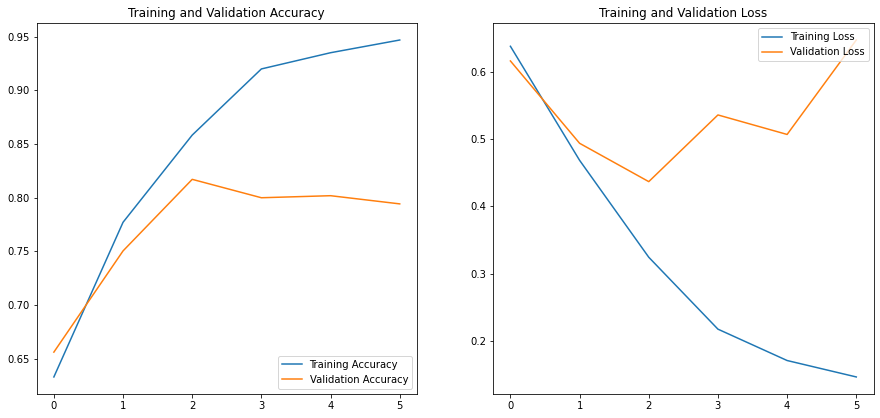

In [31]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs_range = range(6)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
#5 Convolutional layes

cnn5 = tf.keras.models.Sequential()
es = EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1)
cnn5.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[224, 224, 3]))
cnn5.add(tf.keras.layers.MaxPool2D(pool_size=2,padding='same' ,strides=2))
cnn5.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn5.add(tf.keras.layers.MaxPool2D(pool_size=2,padding='same', strides=2))
cnn5.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn5.add(tf.keras.layers.MaxPool2D(pool_size=2,padding='same', strides=2))
cnn5.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn5.add(tf.keras.layers.MaxPool2D(pool_size=2,padding='same', strides=2))
cnn5.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn5.add(tf.keras.layers.MaxPool2D(pool_size=2,padding='same', strides=2))
cnn5.add(tf.keras.layers.Flatten())
cnn5.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn5.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

LEARNING_RATE = 1e-4
optimizer = optimizers.Adam(lr=LEARNING_RATE)

cnn5.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


es = EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1)
history5=cnn5.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[es])

Epoch 1/20
77/77 [==============================] - 34s 443ms/step - loss: 0.6588 - accuracy: 0.6016 - val_loss: 0.6401 - val_accuracy: 0.6152
Epoch 2/20
77/77 [==============================] - 34s 436ms/step - loss: 0.5107 - accuracy: 0.7404 - val_loss: 0.4353 - val_accuracy: 0.7905
Epoch 3/20
77/77 [==============================] - 34s 436ms/step - loss: 0.3711 - accuracy: 0.8380 - val_loss: 0.4132 - val_accuracy: 0.8210
Epoch 4/20
77/77 [==============================] - 34s 437ms/step - loss: 0.2628 - accuracy: 0.9012 - val_loss: 0.4116 - val_accuracy: 0.8229
Epoch 5/20
77/77 [==============================] - 34s 437ms/step - loss: 0.2194 - accuracy: 0.9155 - val_loss: 0.4806 - val_accuracy: 0.8286
Epoch 6/20
77/77 [==============================] - 34s 438ms/step - loss: 0.1677 - accuracy: 0.9322 - val_loss: 0.5551 - val_accuracy: 0.8267
Epoch 7/20
77/77 [==============================] - 34s 437ms/step - loss: 0.1448 - accuracy: 0.9482 - val_loss: 0.5448 - val_accuracy: 0.8333

In [23]:
accuracy_score(y_val, cnn5.predict_classes(x_val))

0.8333333333333334

In [24]:
predictions = cnn5.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['DME (Class 0)','Normal (Class 1)']))

                  precision    recall  f1-score   support

   DME (Class 0)       0.94      0.71      0.81       525
Normal (Class 1)       0.77      0.95      0.85       525

        accuracy                           0.83      1050
       macro avg       0.85      0.83      0.83      1050
    weighted avg       0.85      0.83      0.83      1050



In [25]:
#The best model is cnn5
cnn5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 53, 53, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 25, 25, 32)       

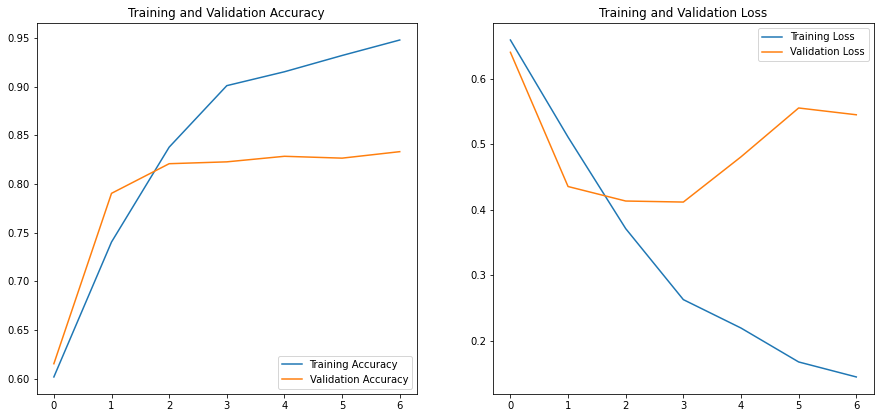

In [26]:
acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
loss = history5.history['loss']
val_loss = history5.history['val_loss']

epochs_range = range(7)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()